In [1]:
from src.ec import aa_ec_map
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Selected ASV names, with "B_" prefix removed for consistency with functional sequence data
asv_name_list = [
    'B_ASV_98229', 'B_ASV_95119', 'B_ASV_83738', 'B_ASV_79875', 'B_ASV_78240',
    'B_ASV_77896', 'B_ASV_70040', 'B_ASV_68290', 'B_ASV_59582', 'B_ASV_48893',
    'B_ASV_38043', 'B_ASV_35282', 'B_ASV_19290', 'B_ASV_17952', 'B_ASV_15625',
    'B_ASV_143173', 'B_ASV_142812', 'B_ASV_140470', 'B_ASV_137520', 'B_ASV_135906',
    'B_ASV_131779', 'B_ASV_129877', 'B_ASV_125122', 'B_ASV_102823', 'B_ASV_100340'
]
asv = [i[2:] for i in asv_name_list]
# Path to folder containing function annotation tables
function_path = r"D:\write\MbPL2021091547_V3V4\function"

In [3]:
# Load all EC function files and filter by selected ASV sequences
ec_list = []
for idx, file in enumerate(os.listdir(function_path)):
    df = pd.read_table(str(os.path.join(function_path, file)), sep="\t")
    ec = df["function"]
    sequence = df["sequence"]
    df = df.loc[:, df.columns.str.contains("AZ|BZ|CZ|DZ")]
    df["ec"] = ec
    df["sequence"] = sequence
    df = df.loc[df["sequence"].isin(asv), :]
    ec_list.append(df)

# Combine data from all files into one DataFrame
function_df = pd.concat(ec_list, axis=0, ignore_index=True)

In [4]:
# Get all EC numbers associated with amino acids
all_ec = []
for i in aa_ec_map().values():
    all_ec.extend(["EC:" + j for j in i])

# Filter the functional DataFrame to only keep these ECs
function_df = function_df.loc[function_df['ec'].isin([i for i in all_ec]), :]
function_df.head()

,AZ01A,AZ01B,AZ01C,AZ02A,AZ02B,AZ02C,AZ03A,AZ03B,AZ03C,AZ04A,...,DZ12B,DZ12C,DZ13A,DZ13B,DZ13C,DZ14A,DZ14B,DZ14C,ec,sequence
15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,EC:1.1.1.23,ASV_100340
16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,EC:1.1.1.25,ASV_100340
24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,EC:1.1.1.3,ASV_100340
39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,EC:1.1.1.42,ASV_100340
49,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,EC:1.1.1.85,ASV_100340


In [5]:
# Calculate the mean value for each time point group
function_df_AZ = function_df.loc[:, function_df.columns.str.contains("AZ")].mean(axis=1)
function_df_BZ = function_df.loc[:, function_df.columns.str.contains("BZ")].mean(axis=1)
function_df_CZ = function_df.loc[:, function_df.columns.str.contains("CZ")].mean(axis=1)
function_df_DZ = function_df.loc[:, function_df.columns.str.contains("DZ")].mean(axis=1)

In [6]:
# Create final DataFrame with average values and metadata
function_df_mean = pd.concat(
    [function_df_AZ, function_df_BZ, function_df_CZ, function_df_DZ, function_df[['ec', 'sequence']]], axis=1)
function_df_mean.columns = ['RC', 'YF', 'EF', 'CC', 'ec', 'sequence']

In [7]:
# Melt the dataframe for plotting
df_melted = function_df_mean.melt(
    id_vars=['sequence', 'ec'],
    value_vars=['RC', 'YF', 'EF', 'CC'],
    var_name='timepoint',
    value_name='value'
)

# Combine sequence and timepoint for plotting
df_melted['sequence_time'] = df_melted['sequence'] + '_' + df_melted['timepoint']
df_melted.head()

,sequence,ec,timepoint,value,sequence_time
0,ASV_100340,EC:1.1.1.23,RC,0.0,ASV_100340_RC
1,ASV_100340,EC:1.1.1.25,RC,0.0,ASV_100340_RC
2,ASV_100340,EC:1.1.1.3,RC,0.0,ASV_100340_RC
3,ASV_100340,EC:1.1.1.42,RC,0.0,ASV_100340_RC
4,ASV_100340,EC:1.1.1.85,RC,0.0,ASV_100340_RC


In [8]:
# Save the processed data to CSV
df_melted.to_csv('./data/df_melted.csv')

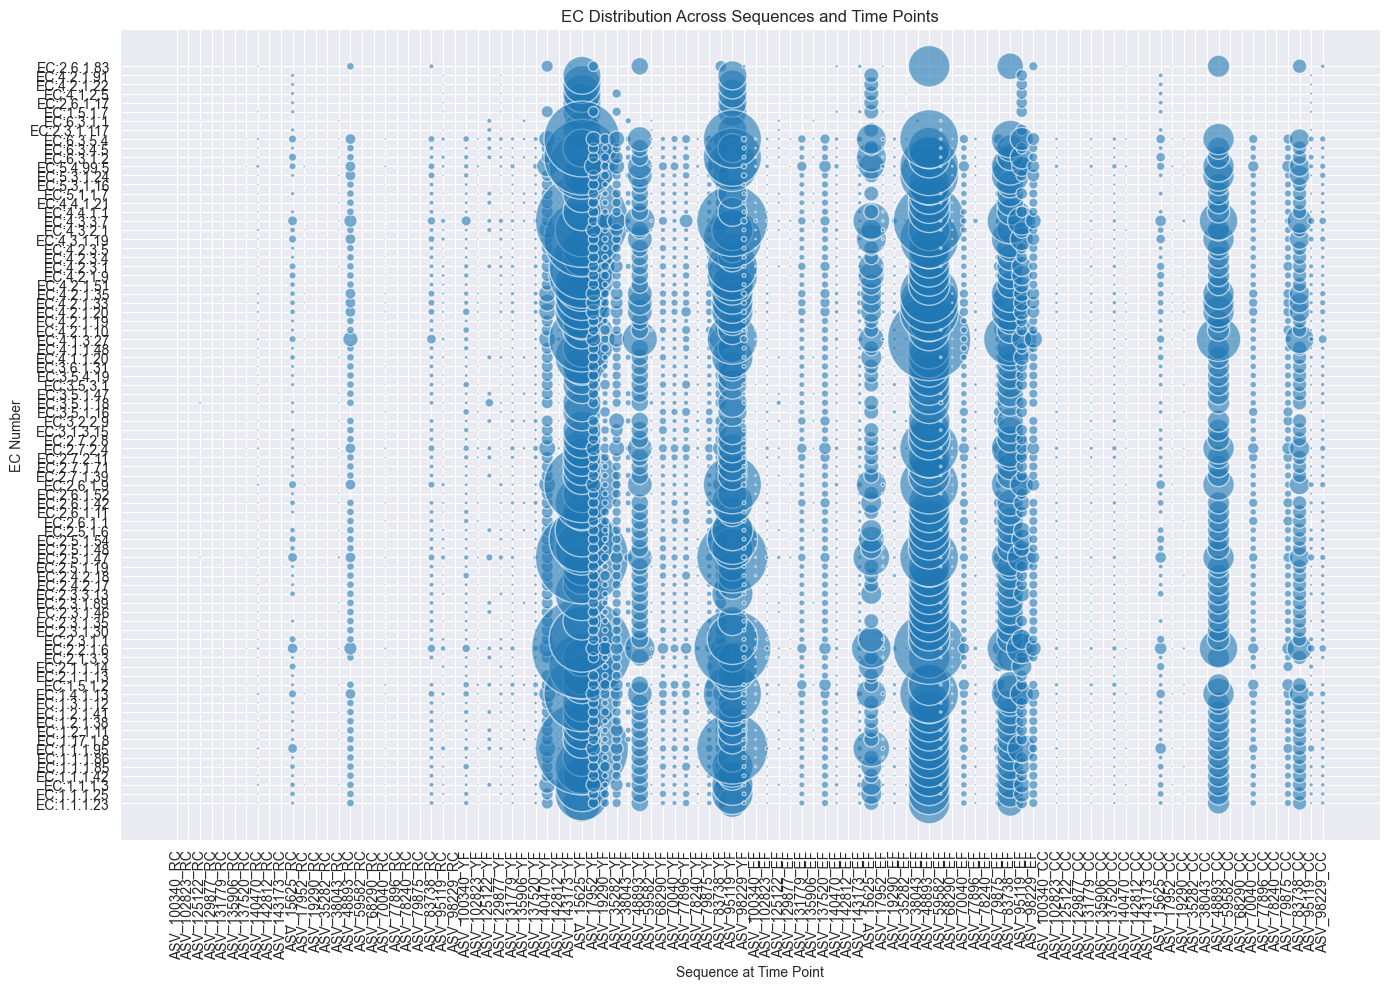

In [9]:
# Plot bubble chart: EC vs sequence_time, sized by value
plt.figure(figsize=(14, 10))
plt.scatter(
    x=df_melted['sequence_time'],
    y=df_melted['ec'],
    s=df_melted['value'] * 5,
    alpha=0.6,
    edgecolors='w'
)

plt.xticks(rotation=90)
plt.xlabel('Sequence at Time Point')
plt.ylabel('EC Number')
plt.title('EC Distribution Across Sequences and Time Points')
plt.tight_layout()
plt.grid(True)
plt.show()